#  ``aggregate``: Reinsurance Credit Risk Examples

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

In [12]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

In [1]:
with open('/temp/talks/watn.txt') as f:
    txt = f.read()
print(txt[:100])

1
State Farm
1

34
America

exited
67
Orion Capital

bought by Royal
2
Allstate
2

35
Employers Re




In [2]:
txt = txt.split('\n')

In [12]:
df = pd.DataFrame(columns=['Rank', 'Name', 'CurrRank', 'Dispoition'])
df["Rank"] =pd.to_numeric(df["Rank"])
df["CurrRank"] =pd.to_numeric(df["CurrRank"])
df = df.set_index('Rank')
df

,Name,CurrRank,Dispoition
Rank,,,


In [13]:
df.dtypes

Name          object
CurrRank       int64
Dispoition    object
dtype: object

In [14]:
for rank,name,now, disp in zip(txt[0::4],txt[1::4],txt[2::4],txt[3::4]):
    df.loc[int(rank)] = (name, now, disp)

In [15]:
df = df.sort_index()

In [17]:
df.to_csv('/temp/talks/watn.csv')

In [3]:
xs = np.linspace(-3, 1, 1001)

In [4]:
ys = np.abs(xs) - 2 * np.sqrt(1 - xs**2)

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


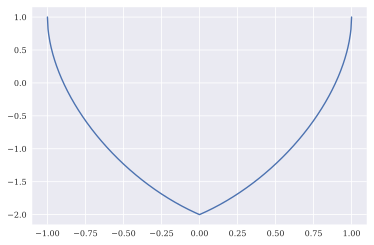

In [5]:
plt.plot(xs, ys)

In [9]:
xs = np.linspace(0,1,101)
p = .4
hs = xs * np.log(xs / p) + (1 - xs) * np.log((1 - xs) / (1-p))
h2 = (xs - p) ** 2

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


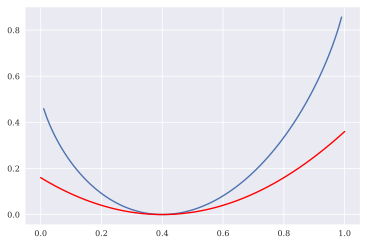

In [10]:
plt.plot(xs, hs)
plt.plot(xs, h2, 'r')

In [62]:
port = uw('''port test
    agg poi    50 claim sev dhistogram xps [1 2 5] [0.9 0.05 0.05] poisson
    agg fixsev 50 claim sev dhistogram xps [1.25] [1] poisson
    agg fix 50 claim sev dhistogram xps [1 2 5] [0.9 0.05 0.05] fixed''')

In [65]:
port.update(8, 1, remove_fuzz=True)

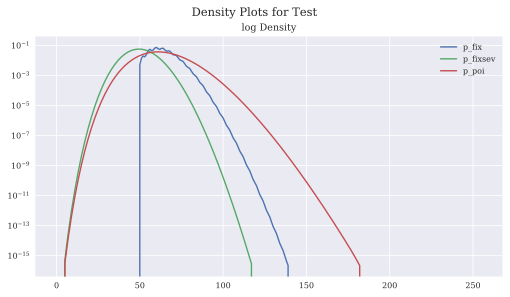

In [66]:
port.plot(line=['poi', 'fixsev', 'fix'], logy=True, aspect=1.8, height=4)

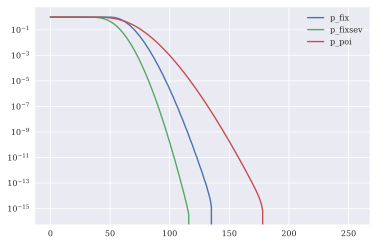

In [73]:
temp = 1 - port.density_df.filter(regex='p_[fp]').sort_index(axis=1).cumsum()
temp.plot(logy=True)

In [67]:
port

,fix,fixsev,poi,total
"(freq, mean)",50,50,50,150
"(freq, cv)",0,0.141421,0.141421,0.0666667
"(freq, skew)",NaN,0.141421,0.141421,0.1
"(sev, mean)",1.25,1.25,1.25,1.25
"(sev, cv)",0.70993,0,0.70993,0.579656
"(sev, skew)",3.78307,NaN,3.78307,4.6333
"(agg, mean)",62.5,62.4998,62.5,187.5
"(agg, cv)",0.100399,0.141421,0.173436,0.0817585
"(agg, skew)",0.535007,0.141421,0.296388,0.168591
Mean,62.5,62.4998,62.5,187.5
